In [1]:
import os
import tensorflow as tf
import numpy as np
from mlp.data_providers import CIFAR10DataProvider, CIFAR100DataProvider
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

### CIFAR-10

In [81]:
train_data = CIFAR10DataProvider('train', batch_size=50)
valid_data = CIFAR10DataProvider('valid', batch_size=50)



In [ ]:
def elastic_transform(image, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    if random_state is None:
        random_state = numpy.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = numpy.meshgrid(numpy.arange(shape[0]), numpy.arange(shape[1]))
    indices = numpy.reshape(y+dy, (-1, 1)), numpy.reshape(x+dx, (-1, 1))

    return map_coordinates(image, indices, order=1).reshape(shape)

def show_single_image(img, fig_size=(5, 5)):
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='Greys')
    ax.axis('off')
    plt.show()
    return fig, ax
show_single_image(train_data.inputs[999].reshape((32, 32,3)))
#image = elastic_transform(train_data.inputs[999].reshape((32, 32,3)),2,2)
print(len(train_data.inputs[999].reshape((32, 32,3)).shape))

In [2]:
def fully_connected_layer_relu(inputs, input_dim, output_dim, nonlinearity=tf.nn.relu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

In [59]:
def fully_connected_layer_elu_reg(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    
    outputs = tf.nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs,weights

In [ ]:
for train_batch,target_batch in train_data:
    print(len(train_batch))
    break;

In [23]:
a = 16
b = tf.to_int64(tf.sqrt(tf.to_float(a))).eval()
print(tf.to_int32(b/2).eval())
img_dim = 32
img_pool_dim = tf.to_int64(32/2).eval()
print(img_pool_dim)

2
16


In [9]:
def convolutional_layer2(inputs, input_dim, output_dim,ic,oc):
    
    out_channels = oc
    in_channels = ic
    img_dim = 32
    img_pool_dim = tf.to_int64(img_dim/2).eval()
    
    weights = tf.Variable(
        tf.truncated_normal(
            [5,5,in_channels,out_channels], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([out_channels]), 'biases')

    x_image = tf.reshape(inputs, [-1,img_dim,img_dim,in_channels]) #[batch, in_height, in_width, in_channels]

    h_conv1 = tf.nn.relu(conv2d(x_image, weights) + biases)
    h_pool1 = max_pool_2x2(h_conv1)
    
    return tf.reshape(h_pool1,[-1,1*img_pool_dim*img_pool_dim*out_channels])

In [10]:
def convolutional_layer(inputs, input_dim, output_dim, conv_channels, img_channels):
    
    dim_squ = tf.to_int64(tf.sqrt(tf.to_float(input_dim))).eval()
    weights = tf.Variable(
        tf.truncated_normal( #  [filter_height, filter_width, in_channels, out_channels]
            [5,5,3,conv_channels], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([conv_channels]), 'biases') #equal to number of channels
    print("INPUTS!=")
    print(inputs)
    x_image = tf.reshape(inputs, [-1,dim_squ,dim_squ,img_channels]) #[batch, in_height, in_width, in_channels]

    h_conv1 = tf.nn.relu(conv2d(x_image, weights) + biases)
    h_pool1 = max_pool_2x2(h_conv1)
    temp = tf.to_int64(1*dim_squ/2*dim_squ/2*conv_channels).eval()
    return tf.reshape(h_pool1,[-1,temp])

In [11]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
with tf.Session() as sess1:
    ba = tf.Variable(tf.random_normal([5, 5, 1, 32]))
    init2 = tf.variables_initializer([ba])
    sess1.run(init_new_vars_op)
    print(sess1.run(ba))
    


In [ ]:
c = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print(c.get_shape().as_list()[0])

In [ ]:
x_image = train_data.inputs[0]

x_image = tf.reshape(x_image,[3,32,32,1])
print(x_image.get_shape().as_list())

In [ ]:
print(train_data.inputs.shape)

In [96]:
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')

keep_prob = tf.placeholder("float")

num_hidden=400
img_channels = 3
conv_channels = 6 #the patches tha will be created


#inputs,input_dimension,output_dimension, type_of_layer

"""
with tf.name_scope('conv-layer-1'):
    hidden_1 = convolutional_layer2(inputs, train_data.inputs.shape[1], num_hidden,img_channels,conv_channels)
"""
with tf.name_scope('fully-connected-layer-1'):
    hidden_1,w1 = fully_connected_layer_elu(inputs, train_data.inputs.shape[1], num_hidden,keep_prob)   
    

with tf.name_scope('fully-connected-layer-2'):
    hidden_2,w2 = fully_connected_layer_elu(hidden_1, hidden_1.get_shape().as_list()[1], num_hidden,keep_prob)
    
with tf.name_scope('fully-connected-layer-3'):
    hidden_3,w3 = fully_connected_layer_elu(hidden_2, hidden_2.get_shape().as_list()[1], num_hidden, keep_prob)
    


'''

with tf.name_scope('fully-connected-layer-4'):
    hidden_4,w4 = fully_connected_layer_elu(hidden_3, hidden_3.get_shape().as_list()[1], num_hidden, keep_prob)
    
with tf.name_scope('fully-connected-layer-5'):
    hidden_5,w5 = fully_connected_layer_elu(hidden_4, hidden_4.get_shape().as_list()[1], num_hidden,keep_prob)
    
with tf.name_scope('fully-connected-layer-6'):
    hidden_6,w6 = fully_connected_layer_elu(hidden_5, hidden_5.get_shape().as_list()[1], num_hidden, keep_prob)

with tf.name_scope('fully-connected-layer-7'):
    hidden_7 = fully_connected_layer_elu(hidden_6, hidden_6.get_shape().as_list()[1], num_hidden)
    
with tf.name_scope('fully-connected-layer-8'):
    hidden_8 = fully_connected_layer_elu(hidden_7, hidden_7.get_shape().as_list()[1], num_hidden)

'''
    
with tf.name_scope('output-layer'):
    outputs,wout = fully_connected_layer_elu(hidden_3, num_hidden, train_data.num_classes,  keep_prob, tf.identity,)
    
    

    
with tf.name_scope('error'):
    l1=0.01
    l2=0.001
    l3 = 0.0001
    l4= 0.00001
    error =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets) )
                           # +l1*tf.nn.l2_loss(w1)+l2*tf.nn.l2_loss(w2)+l2*tf.nn.l2_loss(w3)+l2*tf.nn.l2_loss(w4)+l2*tf.nn.l2_loss(w5)+l2*tf.nn.l2_loss(w6)+l3*tf.nn.l2_loss(wout))
        
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(error)
    
init = tf.global_variables_initializer()

In [ ]:
sess.reset()

End of epoch 01: err(train)=4.36 acc(train)=0.06
                 err(valid)=3.94 acc(valid)=0.12
End of epoch 02: err(train)=4.01 acc(train)=0.10
                 err(valid)=3.74 acc(valid)=0.15
End of epoch 03: err(train)=3.88 acc(train)=0.13
                 err(valid)=3.66 acc(valid)=0.16
End of epoch 04: err(train)=3.78 acc(train)=0.14
                 err(valid)=3.59 acc(valid)=0.17
End of epoch 05: err(train)=3.71 acc(train)=0.15
                 err(valid)=3.53 acc(valid)=0.18
End of epoch 06: err(train)=3.65 acc(train)=0.16
                 err(valid)=3.47 acc(valid)=0.19
End of epoch 07: err(train)=3.60 acc(train)=0.17
                 err(valid)=3.41 acc(valid)=0.19
End of epoch 08: err(train)=3.55 acc(train)=0.18
                 err(valid)=3.39 acc(valid)=0.20
End of epoch 09: err(train)=3.51 acc(train)=0.19
                 err(valid)=3.38 acc(valid)=0.20
End of epoch 10: err(train)=3.45 acc(train)=0.20
                 err(valid)=3.34 acc(valid)=0.21
End of epoch 11: err

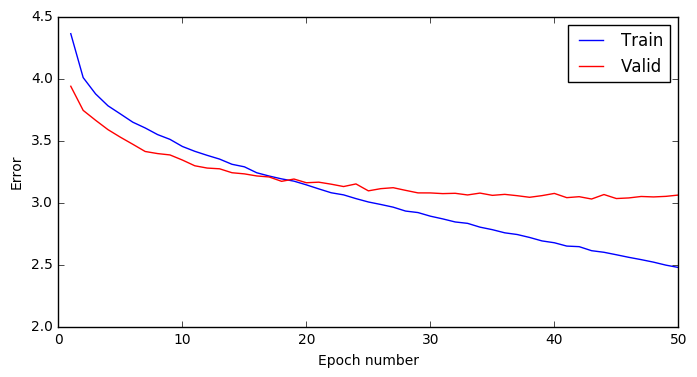

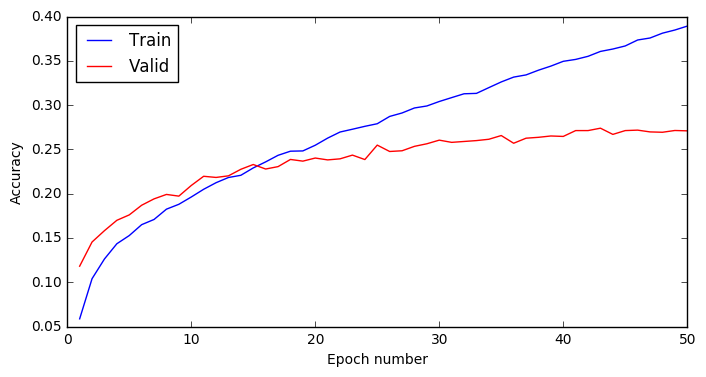

In [99]:
train_error = []
train_accu = []
validation_error = []
validation_accu = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(50):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch, keep_prob:0.9})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        train_error.append(running_error)
        train_accu.append(running_accuracy)
        
        
        if (e + 1) % 1 == 0:  #Every how many epochs to show validation score
            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch,keep_prob:1.0})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
            validation_error.append(valid_error)
            validation_accu.append(valid_accuracy)
            
plot_stats(train_error,train_accu,validation_error,validation_accu)

In [98]:
def plot_stats(error_train,accu_train,error_valid,accu_valid):

    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    ep = len(error_train)
    epochs = list(range(1,ep+1))
      
    ax_1.plot(epochs,error_train, label='Train')
    ax_1.plot(epochs,error_valid,'r', label='Valid')
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')
    
    
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
      
    ax_2.plot(epochs,accu_train, label='Train')
    ax_2.plot(epochs,accu_valid,'r', label='Valid')
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('Accuracy')

    # Plot the change in the validation and training set accuracy over training.
    #fig_2 = plt.figure(figsize=(8, 4))
    #ax_2 = fig_2.add_subplot(111)
    #ax_2.plot(error,accu, label=k)
    #ax_2.legend(loc=0)
    #ax_2.set_xlabel('Epoch number')
    fig_1.savefig('dropout100_error_08.pdf',bbox_inches='tight')
    fig_2.savefig('dropout100_accu_08.pdf',bbox_inches='tight')

    return

In [27]:
b =list(a)
a[0]=5
print(a)
print(b)

[5, 2, 3, 4]
[1, 2, 3, 4]


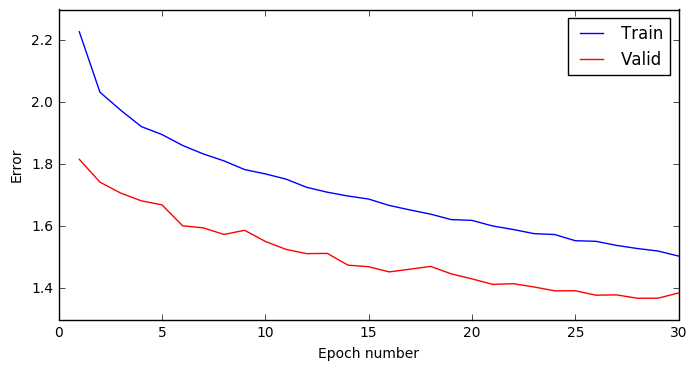

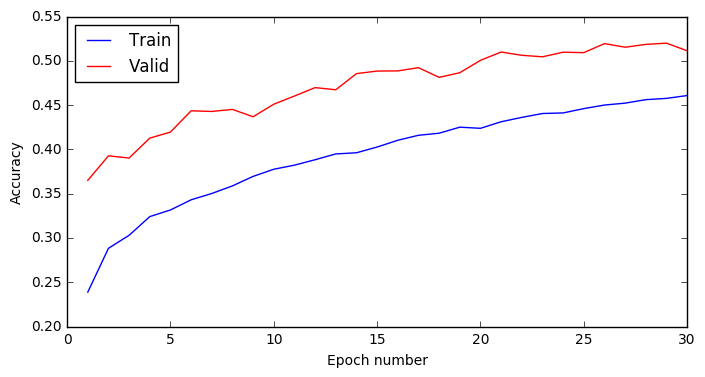

In [91]:
plot_stats(train_error_d08,train_accu_d08,validation_error_d08,validation_accu_d08)

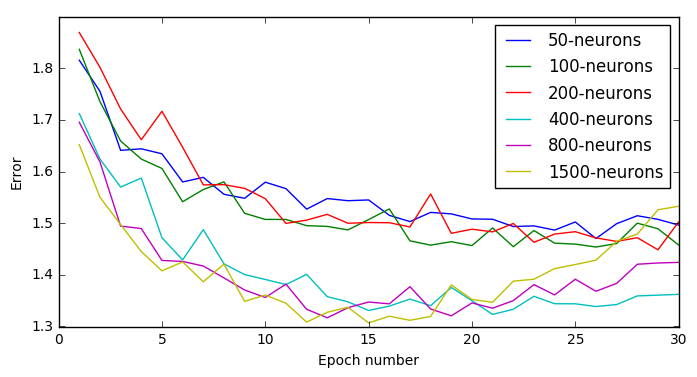

In [82]:
    fig_1 = plt.figure(figsize=(8, 4))
    
    ax_1 = fig_1.add_subplot(111)
    ep = 30
    epochs = list(range(1,ep+1))
      
    #ax_1.plot(epochs,error_train, label='Train')
    ax_1.plot(epochs,validation_error_n50, label='50-neurons')
    
    #ax_2.plot(epochs,error_train, label='Train')
    ax_1.plot(epochs,validation_error_n100, label='100-neurons')
    
    #ax_3.plot(epochs,error_train, label='Train')
    ax_1.plot(epochs,validation_error_n200, label='200-neurons')
    
    #ax_4.plot(epochs,error_train, label='Train')
    ax_1.plot(epochs,validation_error_n400, label='400-neurons')
    
    
    ax_1.plot(epochs,validation_error_n800, label='800-neurons')
    
    ax_1.plot(epochs,validation_error_n1500, label='1500-neurons')
    #ax_5.plot(epochs,error_train, label='Train')
    #ax_5.plot(epochs,error_valid, label='Valid')v
    
    
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')
    
    
    fig_1.savefig('width_error_all.pdf',bbox_inches='tight')

### CIFAR-100

In [92]:
train_data = CIFAR100DataProvider('train', batch_size=50)
valid_data = CIFAR100DataProvider('valid', batch_size=50)

In [36]:
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1,w1 = fully_connected_layer_elu(inputs, train_data.inputs.shape[1], num_hidden)

with tf.name_scope('fc-layer-1'):
    hidden_2,w2 = fully_connected_layer_elu(hidden_1, num_hidden, num_hidden)
    
with tf.name_scope('fc-layer-1'):
    hidden_3,w3 = fully_connected_layer_elu(hidden_2, num_hidden, num_hidden)
    
with tf.name_scope('output-layer'):
    outputs,w4 = fully_connected_layer_elu(hidden_3, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
    
init = tf.global_variables_initializer()

In [37]:
sess = tf.Session()
sess.run(init)
for e in range(30):
    running_error = 0.
    running_accuracy = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_accuracy += batch_acc
    running_error /= train_data.num_batches
    running_accuracy /= train_data.num_batches
    print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
          .format(e + 1, running_error, running_accuracy))
    if (e + 1) % 1 == 0:
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=2.41 acc(train)=0.03
                 err(valid)=4.00 acc(valid)=0.09
End of epoch 02: err(train)=3.79 acc(train)=0.12
                 err(valid)=3.73 acc(valid)=0.13
End of epoch 03: err(train)=3.58 acc(train)=0.15
                 err(valid)=3.53 acc(valid)=0.16
End of epoch 04: err(train)=3.46 acc(train)=0.17
                 err(valid)=3.47 acc(valid)=0.18
End of epoch 05: err(train)=3.36 acc(train)=0.19
                 err(valid)=3.48 acc(valid)=0.18
End of epoch 06: err(train)=3.27 acc(train)=0.21
                 err(valid)=3.41 acc(valid)=0.19
End of epoch 07: err(train)=3.20 acc(train)=0.22
                 err(valid)=3.34 acc(valid)=0.21
End of epoch 08: err(train)=3.13 acc(train)=0.23
                 err(valid)=3.37 acc(valid)=0.20
End of epoch 09: err(train)=3.07 acc(train)=0.25
                 err(valid)=3.38 acc(valid)=0.21
End of epoch 10: err(train)=3.01 acc(train)=0.25
                 err(valid)=3.36 acc(valid)=0.21
End of epoch 11: err